---

## BÀI LÀM

Dữ liệu được cung cấp trong file `income_spending.csv`, chứa thông tin khảo sát về thu nhập, thói quen chi tiêu và tiết kiệm của một nhóm người dân. Bộ dữ liệu bao gồm các cột sau:

- age: Tuổi (năm)
- gender: Giới tính (nam = 'M', nữ = 'F')
- income: Thu nhập hàng năm (USD)
- expenses: Chi tiêu hàng tháng (USD)
- savings: Số tiền tiết kiệm hàng tháng (USD)
- education: Trình độ học vấn (High School, Bachelor, Master, PhD)
- marital_status: Tình trạng hôn nhân (Single, Married, Divorced, Widowed)
- loan_status: Có đang vay nợ không? (1 = Có, 0 = Không)
- investment: Có đang đầu tư không? (1 = Có, 0 = Không)

Bạn hãy viết mã Python để trả lời các câu hỏi sau:


### Câu 1: (7 điểm, CLO 1)

#### a. (2 điểm) Tìm hiểu một số thông tin về bộ dữ liệu:

- Hiển thị 5 dòng đầu tiên của bộ dữ liệu. Cho biết dữ liệu có kích thước bao nhiêu dòng và bao nhiêu cột?
- Dữ liệu có giá trị trống không?

In [42]:
#import libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# YOUR CODE HERE
#5 dong dau tien
df = pd.read_csv("T:/22684961_PhanNhatQuang/income_spending.csv")
df.head()

age gender  income  expenses  savings education marital_status  \
0   56      M   41672      1385  1309.01  Bachelor        Married   
1   46      F   78217      2248  3583.64  Bachelor         Single   
2   32      F   28279      1767   518.16  Bachelor       Divorced   
3   60      F   17017      1947  -451.66  Bachelor         Single   
4   25      M   56600      3322  1109.63    Master       Divorced   

   loan_status  investment  
0            0           1  
1            0           0  
2            0           0  
3            1           0  
4            1           1

In [7]:
# YOUR CODE HERE
#Kich thuoc
df.shape
#Du lieu co 1000 dong va 9 cot

(1000, 9)

In [14]:
df.isnull().sum()
#Du lieu khong co gia tri trong

age               0
gender            0
income            0
expenses          0
savings           0
education         0
marital_status    0
loan_status       0
investment        0
dtype: int64

#### b. (2 điểm) Dựa trên dữ liệu, hãy tính toán hoặc so sánh một số thông tin sau:

- Tính giá trị trung bình, trung vị và độ lệch chuẩn của thu nhập (income) theo từng nhóm giới tính.
- So sánh mức chi tiêu trung bình chi tiêu giữa các nhóm có tình trạng hôn nhân khác nhau (Single, Married, Divorced, Widowed).

In [21]:
# YOUR CODE HERE
#trung binh
mean= df.groupby("gender")["income"].mean()
#trung vi
median=df.groupby("gender")["income"].median()
#Do lech chuan
std= df.groupby("gender")["income"].std()
print(f'Trung binh: {mean}')
print(f'Trung vi: {median}')
print(f'Do lech chuan: {std}')

Trung binh: gender
F    51014.875527
M    50705.673004
Name: income, dtype: float64
Trung vi: gender
F    50793.5
M    50451.0
Name: income, dtype: float64
Do lech chuan: gender
F    15142.339318
M    14901.077936
Name: income, dtype: float64


In [22]:
# YOUR CODE HERE
mean_marital_status= df.groupby("marital_status")["income"].mean()
mean_marital_status
#Mức chi tiêu của Widowed là lớn nhất sau đó lần lượt tới Divorced, Married và Single

marital_status
Divorced    51986.810458
Married     50902.925187
Single      50135.942065
Widowed     52698.183673
Name: income, dtype: float64

#### c. (2 điểm) Phân tích nhóm đối tượng trung niên với các đặc điểm sau:

- Tuổi từ 30 đến 50
- Thu nhập trên mức trung vị của toàn bộ dữ liệu
- Chi tiêu ít hơn 40% thu nhập hàng tháng

Yêu cẩu:
- Tính số lượng người trong nhóm này và so sánh tỷ lệ của họ so với toàn bộ tập dữ liệu.
- Tính giá trị trung bình của thu nhập, chi tiêu và tiết kiệm của nhóm này

In [37]:
# YOUR CODE HERE
#Tuổi từ 30 đến 50
tuoi_tu_30= df[df['age']>29]
tuoi_tu_30_den_50= tuoi_tu_30[tuoi_tu_30['age']<51]
tuoi_tu_30_den_50.head()
#Thu nhập trên mức trung vị của toàn bộ dữ liệu
muc_trung_vi=tuoi_tu_30_den_50['income'].median()
thu_nhap_tren_muc_trung_vi= tuoi_tu_30_den_50[tuoi_tu_30_den_50['income']>muc_trung_vi]
#Chi tiêu ít hơn 40% thu nhập hàng tháng
thu_nhap_it_hon_40_percent= thu_nhap_tren_muc_trung_vi[thu_nhap_tren_muc_trung_vi['expenses']<thu_nhap_tren_muc_trung_vi['income']*0.4]
thu_nhap_it_hon_40_percent
#Tính số lượng người trong nhóm này và so sánh tỷ lệ của họ so với toàn bộ tập dữ liệu.
#So luong
so_luong= thu_nhap_it_hon_40_percent.shape[0]
#Tyle
ty_le= so_luong/len(df)*100
ty_le


22.8

In [39]:
# YOUR CODE HERE
#TB thu nhap
mean_income=thu_nhap_it_hon_40_percent['income'].mean()
#TB chi tieu
mean_expenses=thu_nhap_it_hon_40_percent['expenses'].mean()
#TB tiet kiem
mean_savings = thu_nhap_it_hon_40_percent['savings'].mean()
mean_income,mean_expenses,mean_savings

(63051.65350877193, 1972.7236842105262, 2293.2446052631576)

#### d. (2 điểm) Vẽ biểu đồ:

- Vẽ biểu đồ tán xạ (scatter plot) với trục X cho thu nhập (income) và trục Y cho chi tiêu (expenses). Tô màu các dấu điểm theo nhóm giới tính.
- Vẽ biểu đồ hộp (box plot) cho thu nhập (income) theo trình độ học vấn (education).

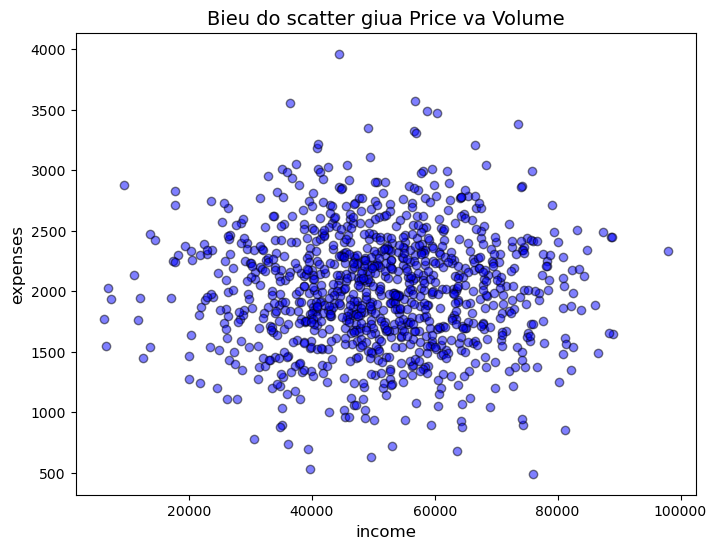

In [40]:
# YOUR CODE HERE
plt.figure(figsize=(8,6))
# plt.scatter(x, y, color, alpha, edgecolor) tạo biểu đồ scatter:
# df["income"]: Trục X (biến độc lập) → Thu nhập.
# df["expenses"]: Trục Y (biến phụ thuộc) → Chi tiêu.
# color="blue": Điểm dữ liệu có màu xanh dương.
# alpha=0.5: Độ trong suốt của điểm (giúp quan sát dữ liệu chồng lấn).
# edgecolor='black': Viền màu đen xung quanh mỗi điểm.

plt.scatter(df["income"],df['expenses'], color="blue", alpha=0.5, edgecolor='black')
# sns.scatterplot(data=df, x="income", y="expenses", hue="gender", alpha=0.5) -- vẽ tô màu theo giới tính với seaborn
plt.title("Bieu do scatter giua Price va Volume", fontsize=14)
# colors = df["gender"].map({"Male": "blue", "Female": "red"}) --vẽ tô màu theo giới tính với matplotlib 
# plt.scatter(df["income"], df["expenses"], c=colors, alpha=0.5)

plt.xlabel(("income"),fontsize=12)
plt.ylabel(("expenses"),fontsize=12)
plt.show()

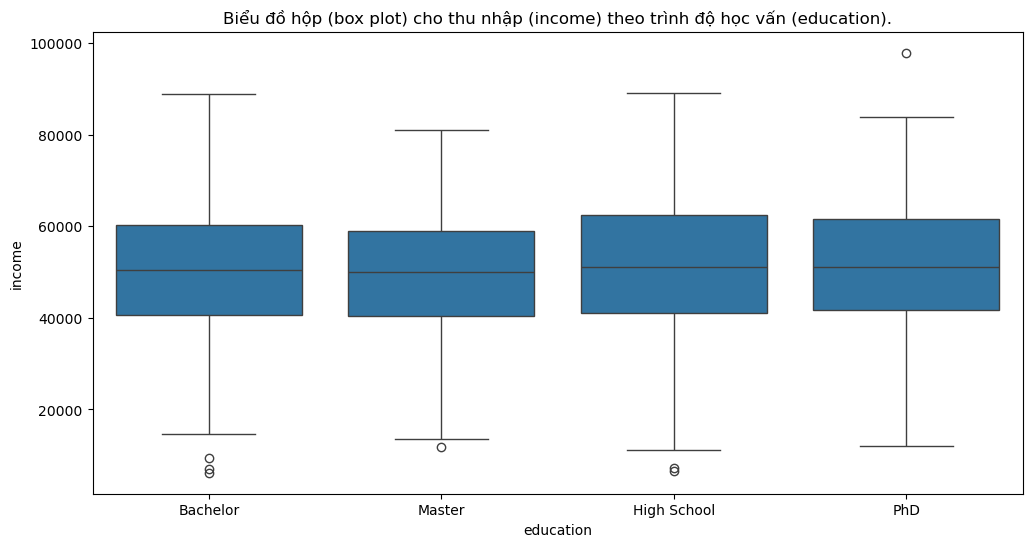

In [47]:
# YOUR CODE HERE
plt.figure(figsize=(12,6))#Tạo một biểu đồ với kích thước rộng 12, cao 6 để dễ nhìn.
# x="education" → Trục hoành (x) hiển thị trình độ học vấn (education).
# y="income" → Trục tung (y) hiển thị thu nhập (income).
# data=df → Sử dụng dữ liệu từ df.
# Seaborn's boxplot() sẽ tự động vẽ một biểu đồ hộp cho mỗi nhóm trong education.
sns.boxplot(x="education",y="income",data=df)
plt.title("Biểu đồ hộp (box plot) cho thu nhập (income) theo trình độ học vấn (education).")
plt.xlabel("education")
plt.ylabel("income")
plt.show()


### Câu 2: (2 điểm, CLO 2)

Sử dụng hàm `df.sample()` để lấy mẫu ngẫu nhiên 100 dòng từ bộ dữ liệu. Tính giá trị trung bình thu nhập (income) của mẫu này.

- Lấy mẫu ngẫu nhiên n = 50 từ bộ dữ liệu và tính trung bình thu nhập trong mẫu. Lặp lại quá trình trên 100 lần và vẽ histogram phân bố của các giá trị trung bình mẫu.
- Lặp lại với n = 100, 200 và so sánh kết quả giữa các kích thước mẫu. Nhận xét về sự thay đổi của trung bình mẫu khi kích thước mẫu tăng.

In [5]:
# YOUR CODE HERE
#Giá trị trung bình thu nhập (income) của mẫu này.
sample_100=df.sample(n=100)
sample_100['income'].mean()
print(f"Trung bình thu nhập của mẫu 100 dòng: {mean_income_100:.2f}")
#Lấy mẫu ngẫu nhiên n = 50 từ bộ dữ liệu và tính trung bình thu nhập trong mẫu. Lặp lại quá trình trên 100 lần và vẽ histogram phân bố của các giá trị trung bình mẫu.
sample_50=df.sample(n=50)
sample_50['income'].mean()


NameError: name 'df' is not defined

In [ ]:
sample_100 = df.sample(n=100, random_state=42)
mean_income_100 = sample_100['income'].mean()
print(f"Trung bình thu nhập của mẫu 100 dòng: {mean_income_100:.2f}")
# Lặp lại quá trình lấy mẫu và tính trung bình
def sample_means(n, num_samples=100):
    means = [df.sample(n=n)['income'].mean() for _ in range(num_samples)]
    return means
    
sample_sizes = [50, 100, 200]
plt.figure(figsize=(12,6))

for i, n in enumerate(sample_sizes):
    means = sample_means(n)
    plt.subplot(1, 3, i+1)
    plt.hist(means, bins=15, alpha=0.7, color='b', edgecolor='black')
    plt.title(f'Kích thước mẫu: {n}')
    plt.xlabel('Trung bình thu nhập')
    plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()


In [ ]:
# YOUR CODE HERE

---